In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [4]:
data = pd.read_csv("rice_wheat_corn_prices.csv")

In [5]:
print(data.shape)
print(data.columns.values)
print(data.info())
print(data.isna().sum())

(360, 9)
['Year' 'Month' 'Price_wheat_ton' 'Price_rice_ton' 'Price_corn_ton'
 'Inflation_rate' 'Price_wheat_ton_infl' 'Price_rice_ton_infl'
 'Price_corn_ton_infl']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  360 non-null    int64  
 1   Month                 360 non-null    object 
 2   Price_wheat_ton       359 non-null    float64
 3   Price_rice_ton        360 non-null    float64
 4   Price_corn_ton        360 non-null    float64
 5   Inflation_rate        359 non-null    float64
 6   Price_wheat_ton_infl  359 non-null    float64
 7   Price_rice_ton_infl   359 non-null    float64
 8   Price_corn_ton_infl   359 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 25.4+ KB
None
Year                    0
Month                   0
Price_wheat_ton         1
Price_rice_ton          0

In [6]:
data = data.dropna()
print(data.isna().sum().sum())

0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

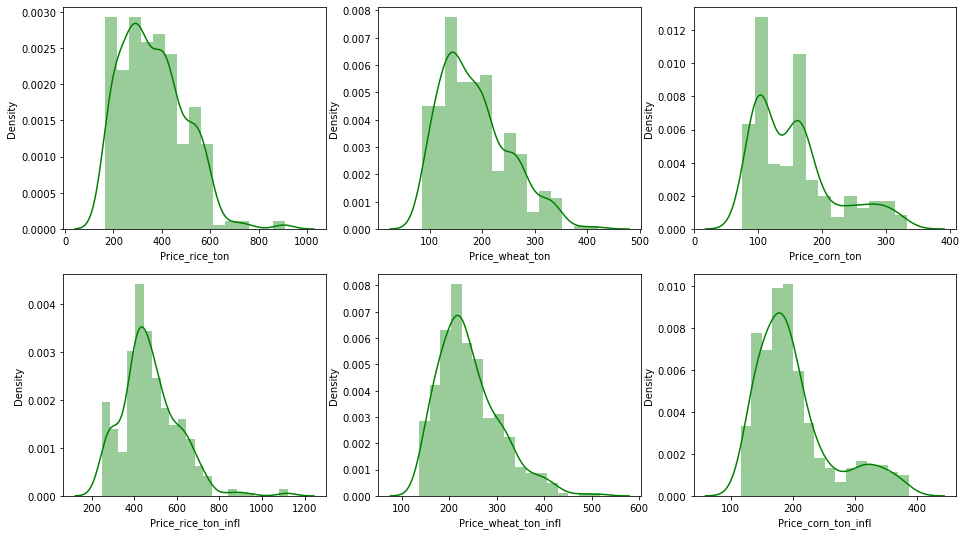

In [8]:
col = ["Price_rice_ton", "Price_wheat_ton", "Price_corn_ton",
       "Price_rice_ton_infl", "Price_wheat_ton_infl", "Price_corn_ton_infl"]

plt.figure(figsize=(16,9))
for (x,y) in zip(col,range(len(col))):
    plt.subplot(2,3,y+1)
    sns.distplot(data[x], color="g")
plt.show()

In [9]:
print(data.dtypes)
print(data.head())

Year                      int64
Month                    object
Price_wheat_ton         float64
Price_rice_ton          float64
Price_corn_ton          float64
Inflation_rate          float64
Price_wheat_ton_infl    float64
Price_rice_ton_infl     float64
Price_corn_ton_infl     float64
dtype: object
   Year Month  Price_wheat_ton  Price_rice_ton  Price_corn_ton  \
0  1992   Feb           170.12          278.25          113.62   
1  1992   Mar           161.44          277.20          117.00   
2  1992   Apr           153.07          278.00          108.52   
3  1992   May           139.72          274.00          109.64   
4  1992   Jun           140.36          268.80          110.90   

   Inflation_rate  Price_wheat_ton_infl  Price_rice_ton_infl  \
0           89.59                322.53               527.53   
1           89.59                306.07               525.54   
2           89.59                290.21               527.06   
3           89.59                264.90      

In [10]:
La = LabelEncoder()
data["Month"] = La.fit_transform(data["Month"])
print(data.dtypes)

Year                      int64
Month                     int32
Price_wheat_ton         float64
Price_rice_ton          float64
Price_corn_ton          float64
Inflation_rate          float64
Price_wheat_ton_infl    float64
Price_rice_ton_infl     float64
Price_corn_ton_infl     float64
dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


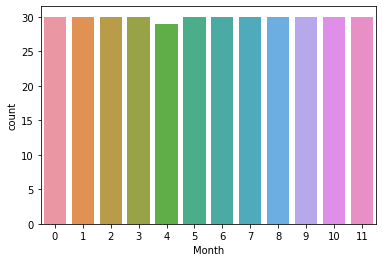

In [11]:
sns.countplot(data["Month"])
plt.show()

30


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


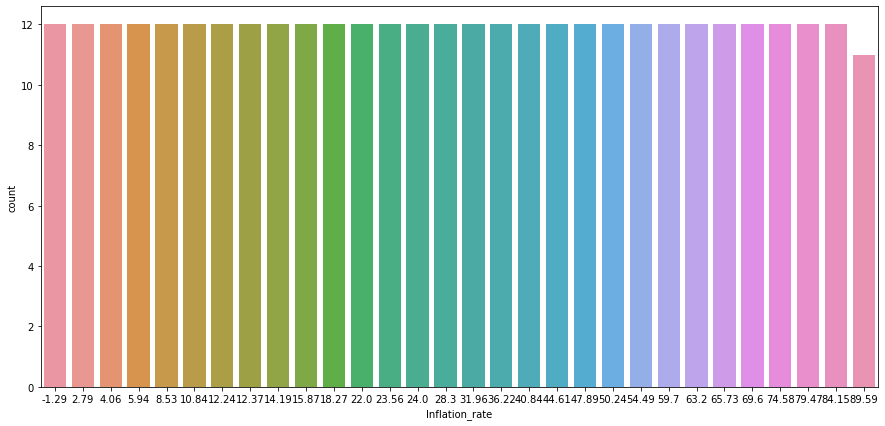

In [12]:
plt.figure(figsize=(15,7))
print(data["Inflation_rate"].nunique())
sns.countplot(data["Inflation_rate"])
plt.show()

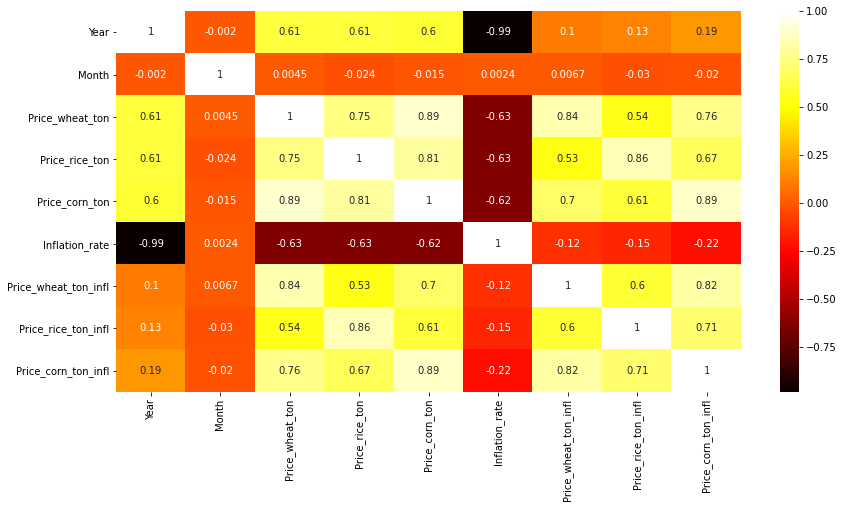

In [13]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True, cmap="hot")
plt.show()

In [14]:
data["category"] = 0
data.loc[(data["Price_rice_ton"] <= 200) & (data["Price_corn_ton"]<= 200) & (data["Price_wheat_ton"] <= 200) , "category"] = 1
data.loc[(data["Price_rice_ton"] <= 400) & (data["Price_corn_ton"]<= 400) & (data["Price_wheat_ton"] <= 400) &
         (data["Price_rice_ton"] > 200) & (data["Price_corn_ton"] > 200) & (data["Price_wheat_ton"] > 200), "category"] = 2
data.loc[(data["Price_rice_ton"] <= 1000) & (data["Price_wheat_ton"] <= 1000) &
         (data["Price_rice_ton"] > 400) & (data["Price_wheat_ton"] > 400), "category"] = 3
data.loc[data["category"] == 0 , "category"] = 4 

print(data["category"].value_counts())

4    307
1     43
2      8
3      1
Name: category, dtype: int64


In [15]:
x = data.drop("category", axis=1)
y = data["category"]

ss = StandardScaler()
x = ss.fit_transform(x)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle =True)
print(X_train.shape)

(305, 9)


In [17]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

print("_"*100)
print(DT.score(X_train, y_train))
print(DT.score(X_test, y_test))
print("_"*100)
y_pred = DT.predict(X_test)

____________________________________________________________________________________________________
1.0
0.9814814814814815
____________________________________________________________________________________________________


[[ 6  0  0]
 [ 0  0  0]
 [ 0  1 47]]


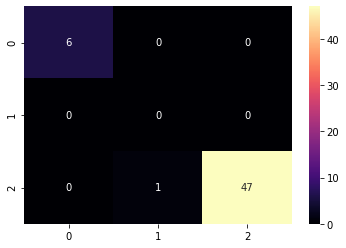

In [18]:
# confusion_matrix
Cm = confusion_matrix(y_test,y_pred)
print(Cm)
sns.heatmap(Cm,annot=True, fmt="d", cmap="magma")
plt.show()

In [ ]:
# The autput result
result = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
# result.to_csv("The autput.csv",index=False)